In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors
import pysal.lib as lps
import pysal.explore.esda as esda

np.random.seed(0)

c:\users\aldrin\desktop\pyprojects\testenv\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
c:\users\aldrin\desktop\pyprojects\testenv\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
pop_df = pd.read_excel('data/Population 2010, 2015 ARMM,BCT.xlsx',
                       usecols=['PSGC_BRGY','Pop2015'])
pop_df = pop_df.rename(columns={'PSGC_BRGY':'Bgy_Code'})
print(pop_df.shape)
pop_df.head()

(2721, 2)


,Bgy_Code,Pop2015
0,PH150702001,672
1,PH150702002,1255
2,PH150702004,500
3,PH150702005,2359
4,PH150702006,2918


In [3]:
bgy_gdf = gpd.read_file('geodata/AdministrativeBoundariesARMMBarangaysPSA2016.shp')
keep_cols = ['Pro_Name','Pro_Code','Bgy_Name','Bgy_Code','geometry']
bgy_gdf = bgy_gdf[keep_cols]
print(bgy_gdf.shape)
bgy_gdf.head()

(2490, 5)


,Pro_Name,Pro_Code,Bgy_Name,Bgy_Code,geometry
0,SULU,PH156600000,Mamanok,PH156618008,"MULTIPOLYGON (((198187.339 622969.886, 198189...."
1,SULU,PH156600000,Suang Bunah,PH156608016,"MULTIPOLYGON (((164555.687 649030.520, 164556...."
2,SULU,PH156600000,Alu Bunah,PH156608001,"MULTIPOLYGON (((215106.818 681890.876, 215102...."
3,MAGUINDANAO,PH153800000,Pagatin (Pagatin I),PH153837016,"POLYGON ((665423.631 771177.541, 666079.572 77..."
4,BASILAN,PH150700000,Balanting,PH150713002,"MULTIPOLYGON (((393459.300 700415.082, 393450...."


In [4]:
pop_gdf = bgy_gdf.merge(pop_df,how='left',on=['Bgy_Code'])
pop_gdf['Pop2015'].fillna((pop_gdf['Pop2015'].mean()), inplace=True)
pop_gdf.head()

,Pro_Name,Pro_Code,Bgy_Name,Bgy_Code,geometry,Pop2015
0,SULU,PH156600000,Mamanok,PH156618008,"MULTIPOLYGON (((198187.339 622969.886, 198189....",747.0
1,SULU,PH156600000,Suang Bunah,PH156608016,"MULTIPOLYGON (((164555.687 649030.520, 164556....",1364.0
2,SULU,PH156600000,Alu Bunah,PH156608001,"MULTIPOLYGON (((215106.818 681890.876, 215102....",770.0
3,MAGUINDANAO,PH153800000,Pagatin (Pagatin I),PH153837016,"POLYGON ((665423.631 771177.541, 666079.572 77...",1558.0
4,BASILAN,PH150700000,Balanting,PH150713002,"MULTIPOLYGON (((393459.300 700415.082, 393450....",1411.0


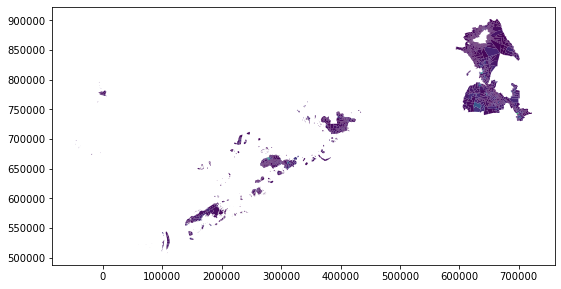

In [5]:
pop_gdf.plot(column='Pop2015',figsize=(9,9))

Spatial Weights

In [6]:
wq =  lps.weights.Queen.from_dataframe(pop_gdf)
wq.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 14, ' is an island (no neighbors)')
('WARNING: ', 60, ' is an island (no neighbors)')
('WARNING: ', 62, ' is an island (no neighbors)')
('WARNING: ', 79, ' is an island (no neighbors)')
('WARNING: ', 80, ' is an island (no neighbors)')
('WARNING: ', 82, ' is an island (no neighbors)')
('WARNING: ', 97, ' is an island (no neighbors)')
('WARNING: ', 104, ' is an island (no neighbors)')
('WARNING: ', 124, ' is an island (no neighbors)')
('WARNING: ', 230, ' is an island (no neighbors)')
('WARNING: ', 336, ' is an island (no neighbors)')
('WARNING: ', 337, ' is an island (no neighbors)')
('WARNING: ', 345, ' is an island (no neighbors)')
('WARNING: ', 390, ' is an island (no neighbors)')
('WARNING: ', 391, ' is an island (no neighbors)')
('WARNING: ', 392, ' is an island (no neighbors)')
('WARNING: ', 397, ' is an island (no neighbors)')
('WARNING: ', 478, ' is an island (no neig

c:\users\aldrin\desktop\pyprojects\testenv\lib\site-packages\pysal\lib\weights\weights.py:168: UserWarning: There are 36 disconnected observations 
  Island ids: 0, 7, 14, 60, 62, 79, 80, 82, 97, 104, 124, 230, 336, 337, 345, 390, 391, 392, 397, 478, 491, 618, 636, 685, 717, 738, 749, 771, 772, 775, 776, 780, 781, 892, 957, 1021
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


Global Spatial Autocorrelation

In [7]:
y = pop_gdf['Pop2015']
mi = esda.moran.Moran(y, wq)
mi.I,mi.p_sim

(0.486747869230573, 0.001)

Local Autocorrelation

In [8]:
lag_val = lps.weights.lag_spatial(wq, y)

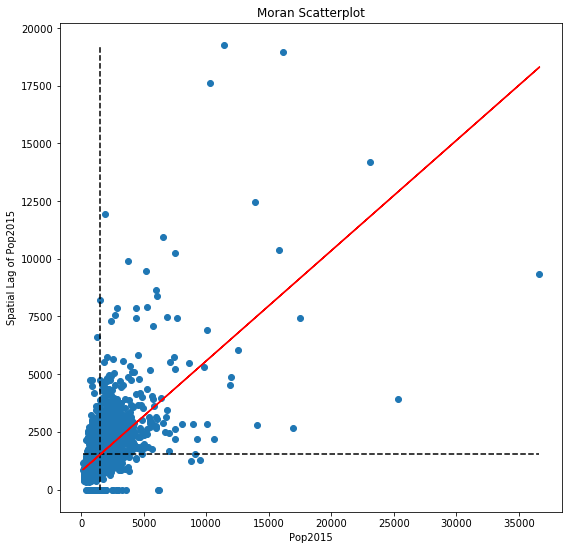

In [9]:
b, a = np.polyfit(y, lag_val, 1)
f, ax = plt.subplots(1, figsize=(9, 9))
plt.scatter(y, lag_val)
plt.vlines(y.mean(), lag_val.min(), lag_val.max(), linestyle='--')
plt.hlines(lag_val.mean(), y.min(), y.max(), linestyle='--')
plt.plot(y, a + b*y, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Pop2015')
plt.xlabel('Pop2015')
plt.show()

In [10]:
li = esda.moran.Moran_Local(y, wq)
li.q,(li.p_sim < 0.05).sum()

(array([3, 3, 3, ..., 1, 1, 1]), 860)

In [11]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond

In [12]:
pd.Series(spots).value_counts()

0    1630
3     606
1     188
4      39
2      27
dtype: int64

In [28]:
spot_labels = [ '0 ns', '1 hot spot', '2 low spatial outlier', '3 cold spot', '4 high spatial outlier']
labels = [spot_labels[i] for i in spots]

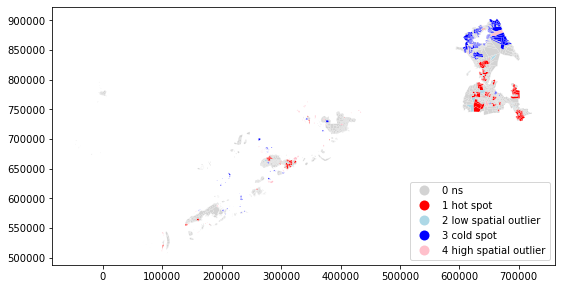

In [29]:
df = pop_gdf
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
fig, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
                          k=2, cmap=hmap, linewidth=0.1, ax=ax, \
                          edgecolor='white',  legend=True,
                          legend_kwds={'loc': 'lower right'})
plt.show()

In [31]:
pop_cluster = pd.DataFrame(pop_gdf['Bgy_Code'])
pop_cluster['labels']=labels
pop_cluster.head()

,Bgy_Code,labels
0,PH156618008,3 cold spot
1,PH156608016,0 ns
2,PH156608001,0 ns
3,PH153837016,0 ns
4,PH150713002,0 ns
